In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitting

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
Fit = fitting.Fit()
Fit.I0_use     = False   # using for reference I0 
Fit.Oxygen     = True    # defualt = True  // calculating only oxygen term
Fit.LP_mode    = 2   # defualt = True  // calculating for Ge(220)-2 bounce monochromatic beam
Fit.eta_phi    = True    # defualt = False //
Fit.c = 3.944
#Fit.wavelength = 0.7
Fit.import_data("Data/SRO_vac_temp-dep.csv")

/home/eom/Calc.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return np.abs(self.sind(a/2)/self.sind(theta+a/2)+self.sind(a/2)/self.sind(theta-a/2))*np.abs(1/(np.sin(np.radians(chi))))


In [4]:
Xray_Data = pd.DataFrame({'H':Fit.h,'K':Fit.k,'L':Fit.l,'theta':Fit.theta,'chi':Fit.chi,'phi':Fit.phi,'eta':Fit.eta,'Intensity':Fit.ED})
#Filter = Xray_Data.sort_values(by='phi',ascending = False)
display(Xray_Data)

,H,K,L,theta,chi,phi,eta,Intensity
0,0.0,0.0,4.0,51.372235,0.000000,-90.000000,inf,1.000000
1,0.5,0.0,1.5,18.005805,18.606444,-90.000000,0.017696,0.087327
2,0.5,0.0,2.5,29.875893,11.419933,-90.000000,0.017696,0.022548
3,0.5,0.0,3.5,43.681135,8.210198,-90.000000,0.017696,0.009519
4,0.5,0.5,1.5,18.933250,25.459704,-45.000000,0.012513,0.093603
5,0.5,0.5,2.5,30.516942,15.942919,-45.000000,0.012513,0.001918
6,0.5,0.5,3.5,44.238849,11.532783,-45.000000,0.012513,0.022903
7,0.5,1.0,1.5,21.511546,36.972434,-26.565051,0.007914,0.024098
8,0.5,1.0,2.0,26.651782,29.449073,-26.565051,0.007914,0.010291
9,0.5,1.5,0.5,19.075741,72.614622,-18.434949,0.005596,0.024454


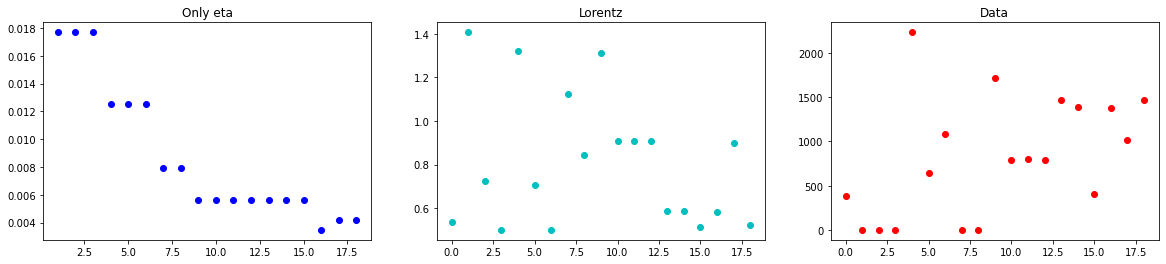

In [5]:
Fit.Background_Effect(8.,6.,5.,0.25,0.25,0.25,0.25)

In [6]:
Fit.Init=[4.,4.,5,
          0,0,
          0.15,0.35,0.35,0.15]
Fit.Low_Boundary =[-25,-25,-25, 
                    -0.2,-0.2,
                    0.,0.,0.,0.]
Fit.High_Boundary=[50,30,30,
                    0.3,0.08,
                    1.,1.,1.,1.]
Fit.direction = '+--'
Fit.cons = [
    
            {'type':'eq','fun':lambda x: x[5]+x[6]+x[7]+x[8]-1},
    
            ]
"""Fit.cons = [
            {'type':'eq','fun':Fit.Cons_x_equal},
            {'type':'eq','fun':Fit.Cons_y_equal},
            {'type':'eq','fun':Fit.Cons_xy_equal}]"""
"""Fit.cons = [{'type':'eq','fun':Fit.Cons_ab_equal},
            {'type':'eq','fun':Fit.Cons_x_equal},
            {'type':'eq','fun':Fit.Cons_y_equal},
            {'type':'eq','fun':Fit.Cons_xy_equal}]"""

"Fit.cons = [{'type':'eq','fun':Fit.Cons_ab_equal},\n            {'type':'eq','fun':Fit.Cons_x_equal},\n            {'type':'eq','fun':Fit.Cons_y_equal},\n            {'type':'eq','fun':Fit.Cons_xy_equal}]"

4 False
alpha : 4.0
beta  : 4.0
gamma : 5.0
d1    : 0.0
d2    : 0.0
X1    : 15.0
Y1    : 35.0
X2    : 35.0
Y2    : 15.0
fun   : nan


/home/eom/Calc.py:467: RuntimeWarning: invalid value encountered in cdouble_scalars
  I += self.I0*eta*L_P* F_HKL * np.conj(F_HKL)*vol_frac
/home/eom/Calc.py:467: RuntimeWarning: invalid value encountered in multiply
  I += self.I0*eta*L_P* F_HKL * np.conj(F_HKL)*vol_frac


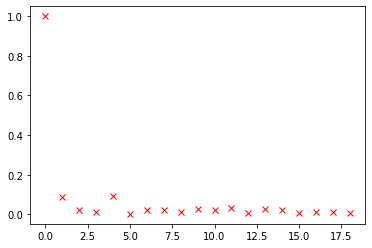

In [7]:
Fit.fit_minimize()
Fit.Init = Fit.res.x
Fit.fit_result()

In [8]:
Fit.res

     fun: nan
     jac: array([nan, nan, nan, nan, nan, nan, nan, nan, nan])
 message: 'Inequality constraints incompatible'
    nfev: 10
     nit: 1
    njev: 1
  status: 4
 success: False
       x: array([4.  , 4.  , 5.  , 0.  , 0.  , 0.15, 0.35, 0.35, 0.15])

In [9]:
def func(alpha,beta,gamma,d1,d2,X1,Y1,X2,Y2):
    TD=Fit.TD([alpha/10,beta/10,gamma/10,d1/1000,d2/1000,X1/100,Y1/100,X2/100,Y2/100])
    plt.plot(np.arange(Fit.h.shape[0]),TD,'bo')
    plt.plot(np.arange(Fit.h.shape[0]),Fit.ED,'rx')
    
alpha = widgets.IntSlider(min=-200., max=200., step=1, value=0.)
beta = widgets.IntSlider(min=-200., max=200., step=1, value=0.)
gamma = widgets.IntSlider(min=-200., max=200., step=1, value=0.)
d1 = widgets.IntSlider(min=0., max=50., step=1, value=0.)
d2 = widgets.IntSlider(min=0., max=50., step=1, value=0.)
X1 = widgets.IntSlider(min=0., max=100., step=1, value=25)
Y1 = widgets.IntSlider(min=0., max=100., step=1, value=25)
X2 = widgets.IntSlider(min=0., max=100., step=1, value=25)
Y2 = widgets.IntSlider(min=0., max=100., step=1, value=25)

interact(func,alpha=alpha,beta=beta,gamma=gamma,d1=d1,d2=d2,X1=X1,Y1=Y1,X2=X2,Y2=Y2)

interactive(children=(IntSlider(value=0, description='alpha', max=200, min=-200), IntSlider(value=0, descripti…

<function __main__.func(alpha, beta, gamma, d1, d2, X1, Y1, X2, Y2)>

In [10]:
Run = False
if Run == True:
    a_min = 5
    a_max = 15
    c_min = 5
    c_max = 17
    a = np.linspace(a_min,a_max,100)
    c = np.linspace(c_min,c_max,100)
    x,y = np.meshgrid(a,c)
    Result = np.zeros((a.shape[0],c.shape[0]))
    for i in range(c.shape[0]):
        if i %10 == 0:
            print(i)
        for j in range(a.shape[0]):
            Result[i,j] = np.sum(np.abs(Fit.ED-Fit.TD([x[i,j],x[i,j],y[i,j],0,0,0.25,0.25,0.25,0.25])))
    plt.figure(figsize=(10,10))
    plt.imshow(np.log(Result),origin='lower',extent=[a_min,a_max,c_min,c_max])